In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import dabl

In [3]:
data=pd.read_csv('Mall_Customers.csv')

In [4]:
print("Shape of the dataset: ",data.shape)

Shape of the dataset:  (200, 5)


In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
80,81,Male,57,54,51
149,150,Male,34,78,90
153,154,Female,38,78,76


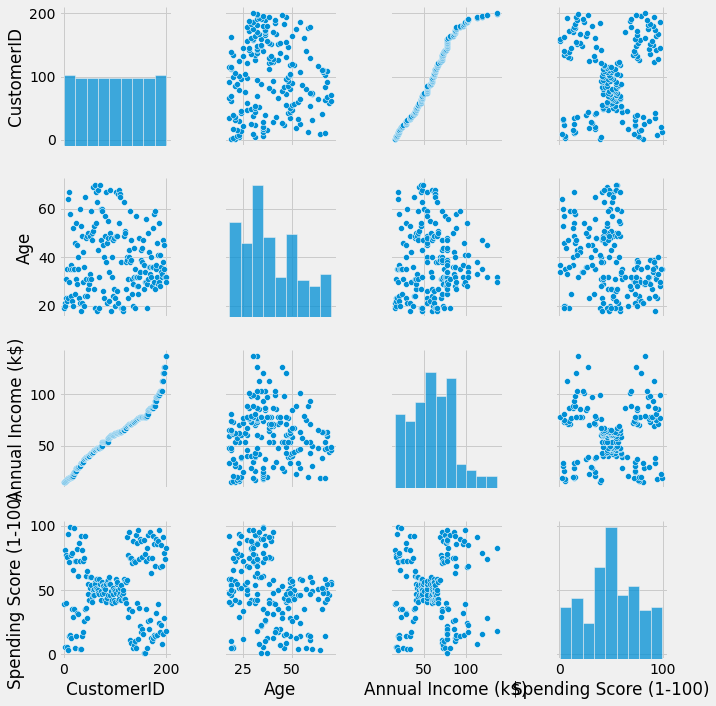

In [8]:
#pairwise relationship in dataset
sns.pairplot(data)
plt.show()

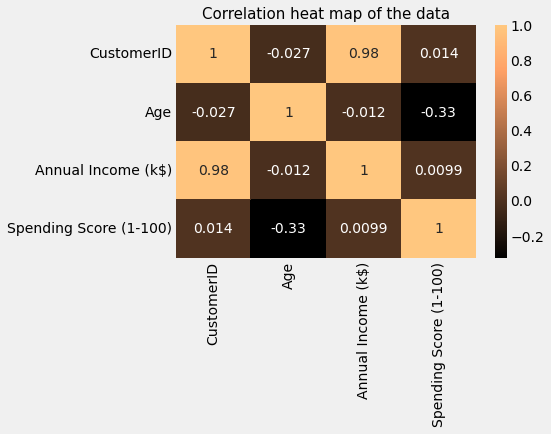

In [10]:
#Correlation heat map of the data
sns.heatmap(data.corr(),annot=True,cmap='copper')
plt.title('Correlation heat map of the data',fontsize=15)
plt.show()

Target looks like regression


c:\users\mvyas\appdata\local\programs\python\python36\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=6.76E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

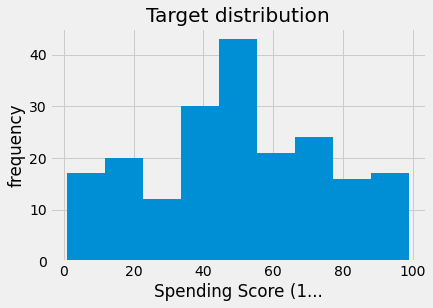

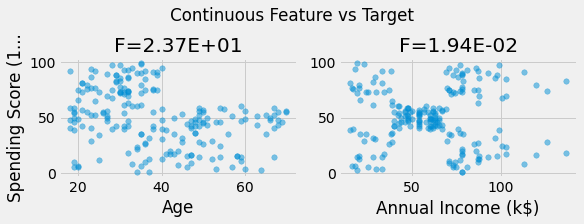

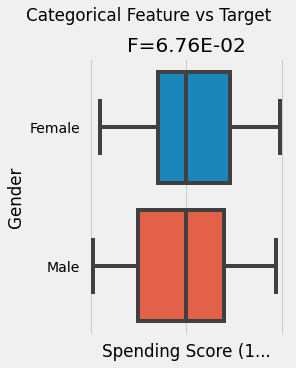

In [12]:
#Analyze data wrt to spending score
dabl.plot(data,target_col='Spending Score (1-100)')

Target looks like regression


c:\users\mvyas\appdata\local\programs\python\python36\lib\site-packages\dabl\plot\utils.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  for t in ax.get_xticklabels()]


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

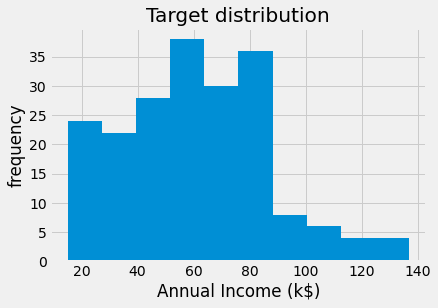

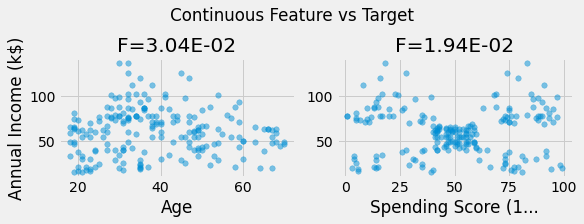

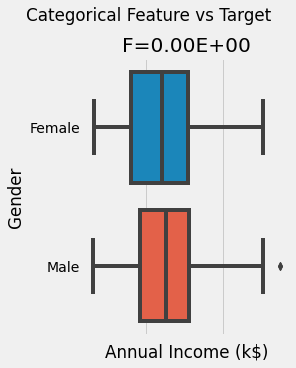

In [14]:
#Analyze wrt to annual income
dabl.plot(data,target_col='Annual Income (k$)')

In [15]:
#Describe data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
#Describe categorical data
data.describe(include='object')

,Gender
count,200
unique,2
top,Female
freq,112


In [20]:
#Check if there is any null data
data.isnull().any().any()

False

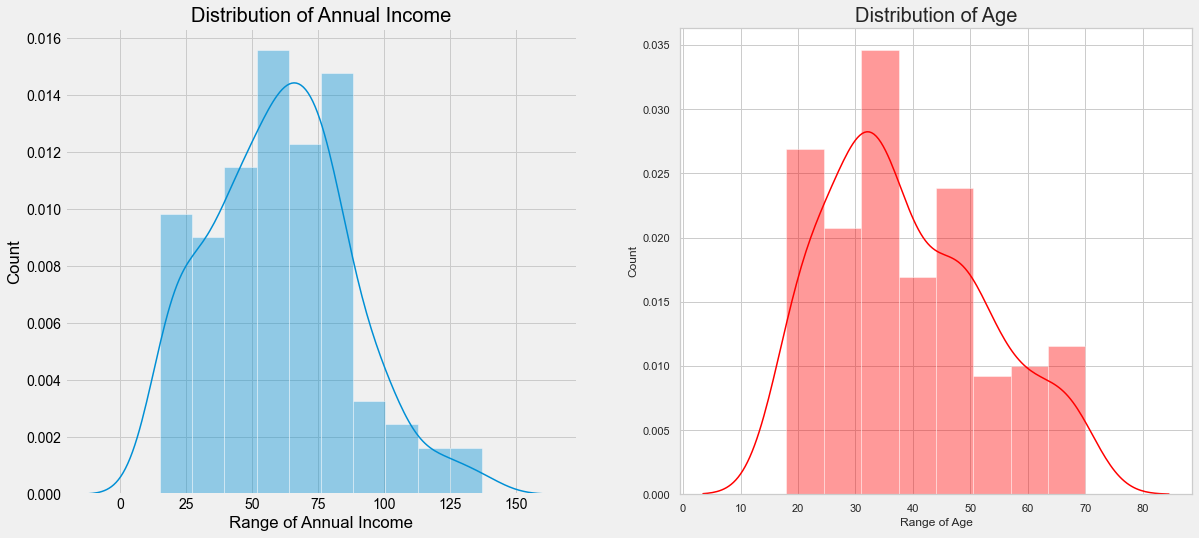

In [21]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

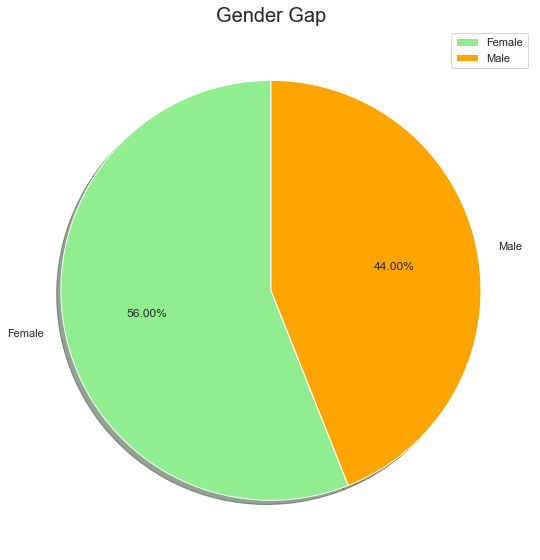

In [22]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

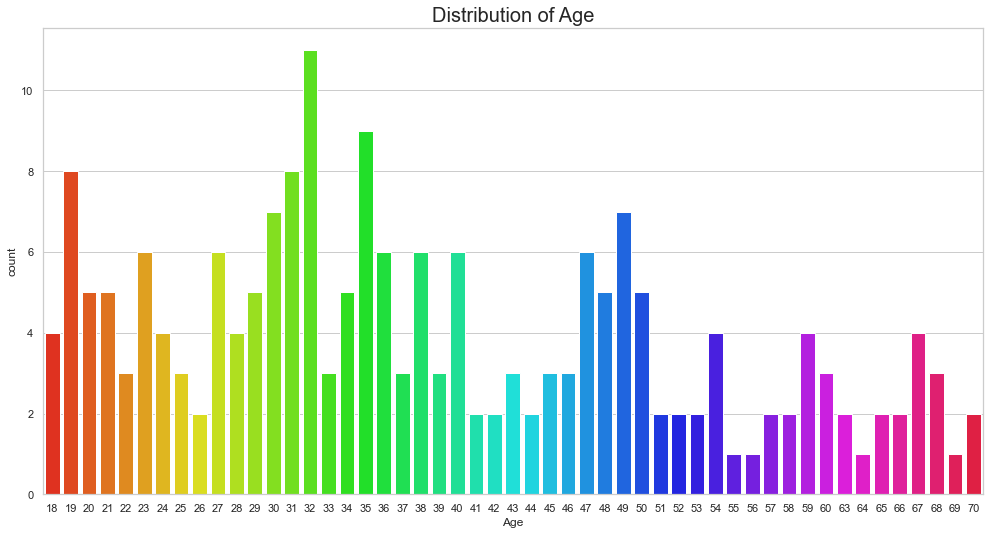

In [23]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

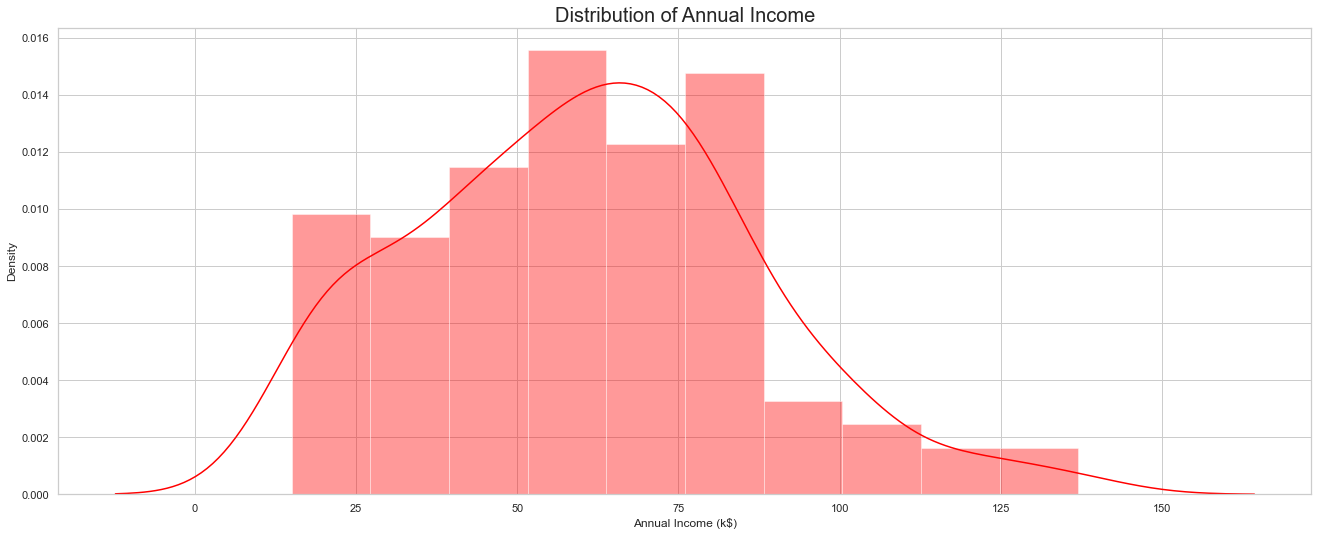

In [24]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

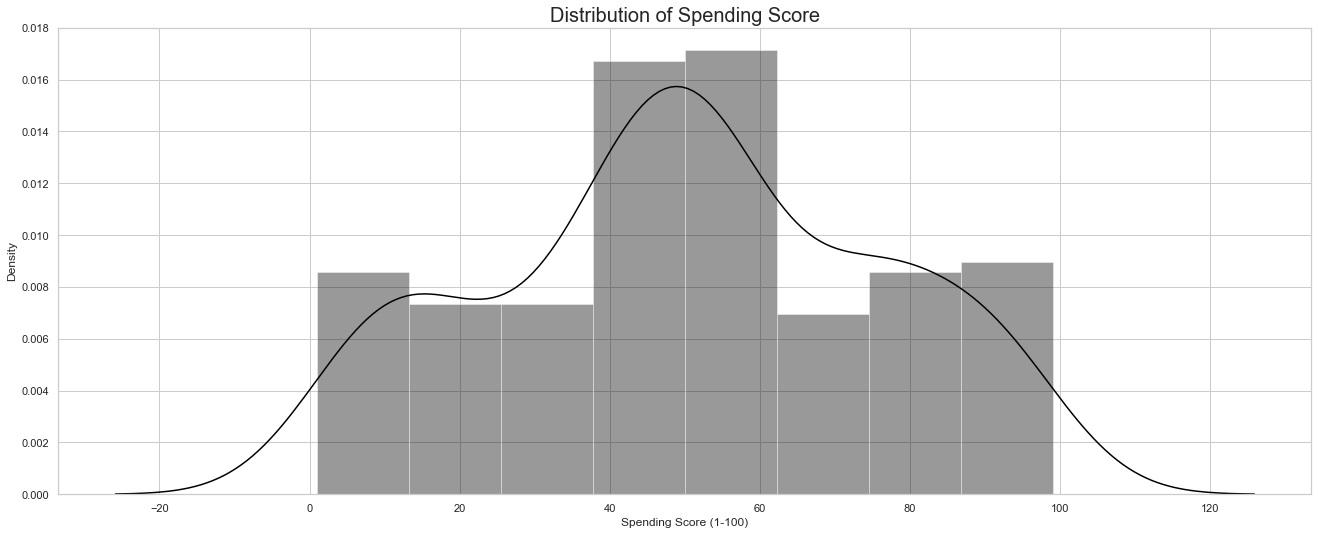

In [25]:
# lets check the distribution of Spending Score
plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

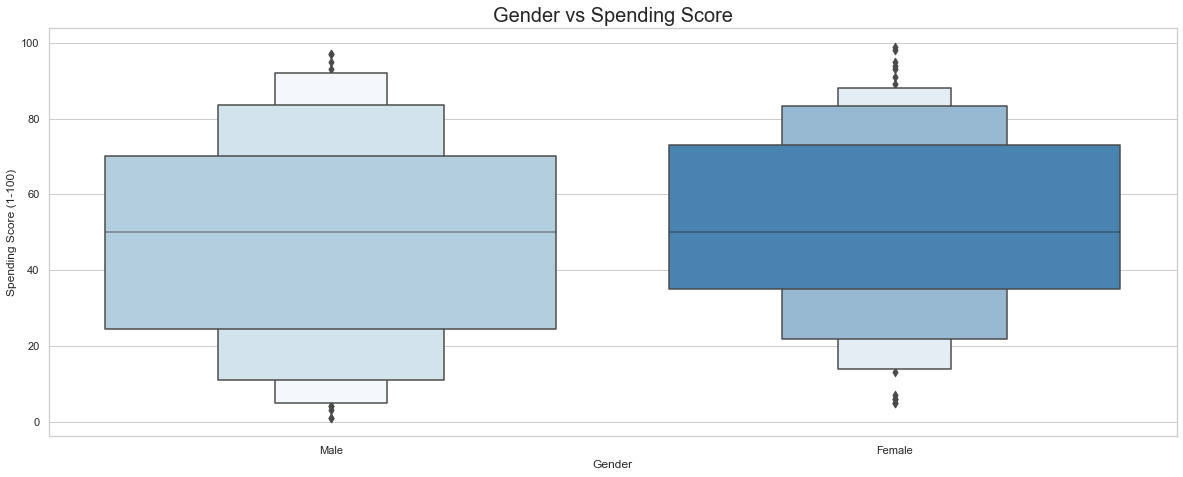

In [26]:
#  Gender vs Spendscore
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()


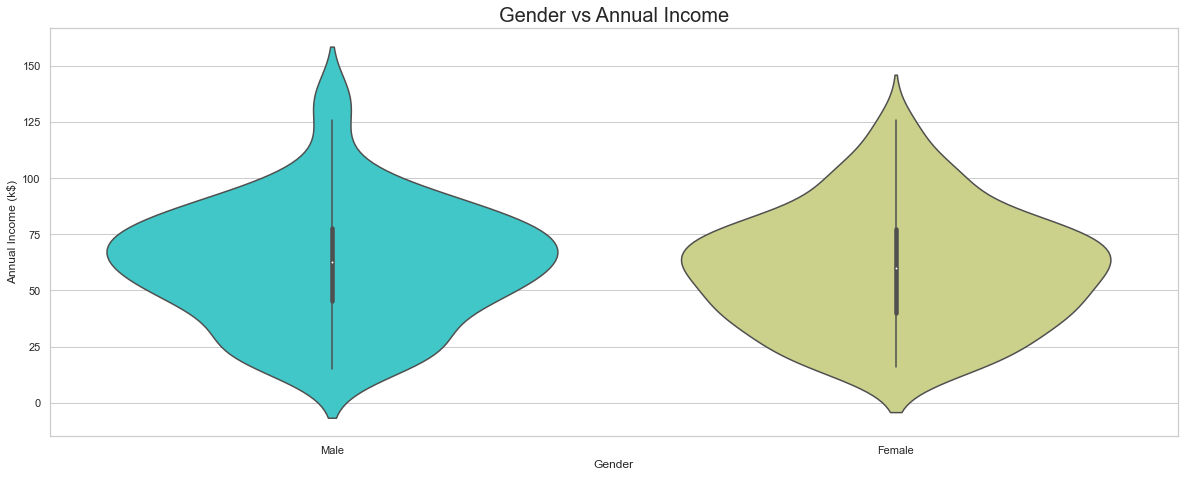

In [27]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

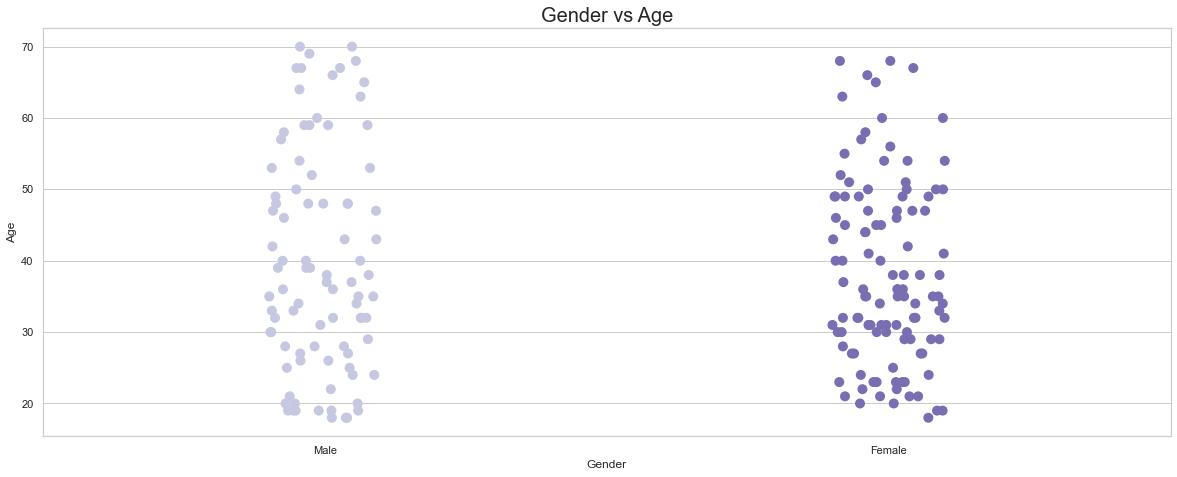

In [28]:
# Gender vs Age
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

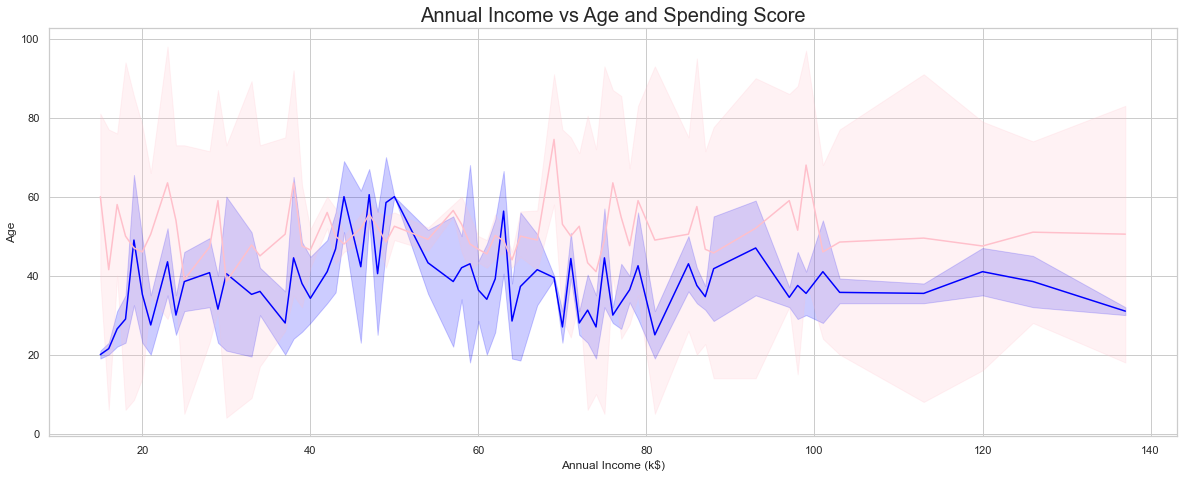

In [29]:
# Annual Income vs Age and Spending Score
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [30]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [31]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


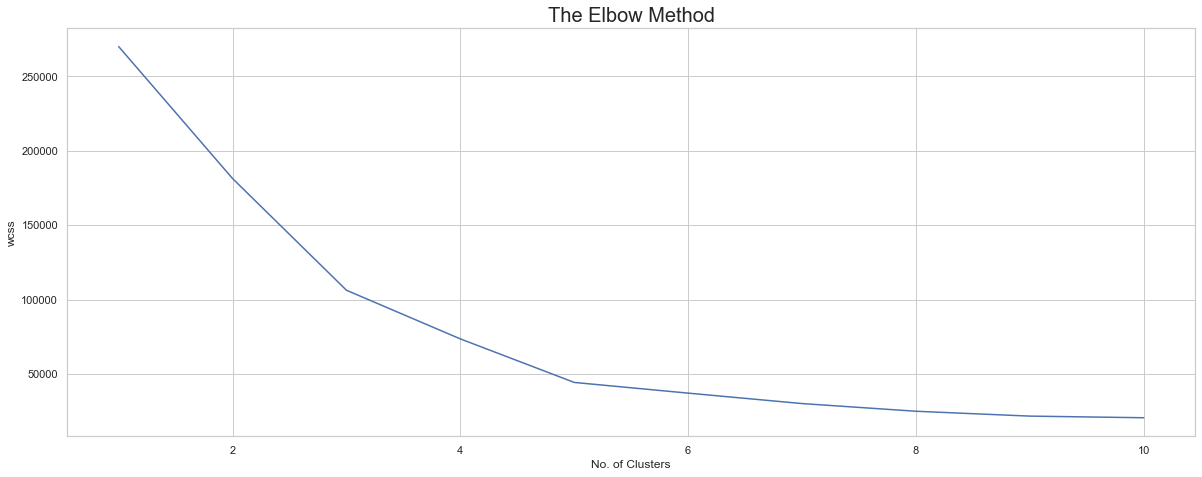

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

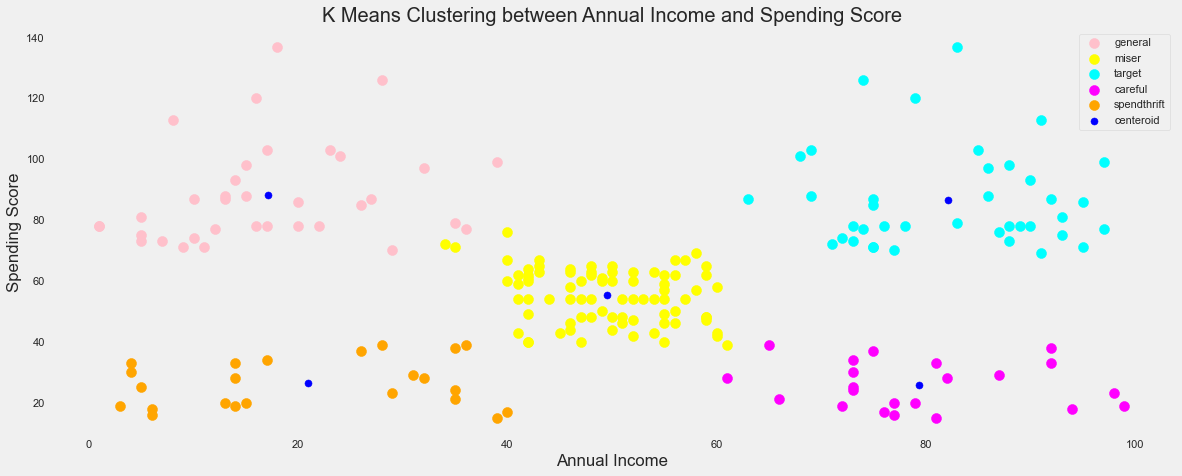

In [33]:
# lets visualize these clusters
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'miser')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'spendthrift')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

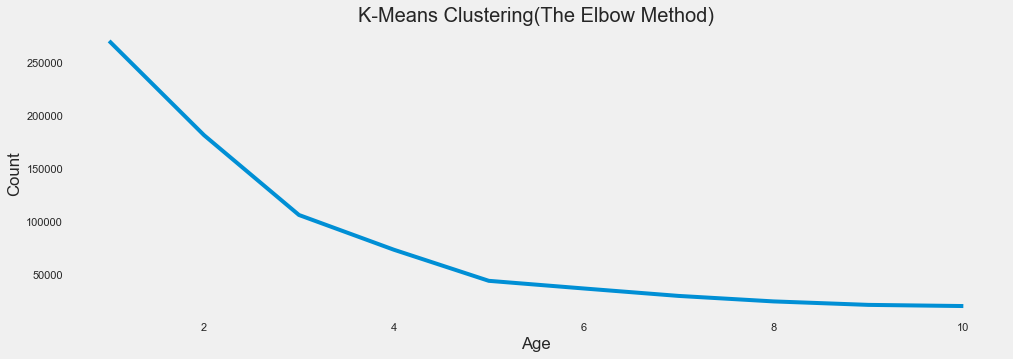

In [34]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

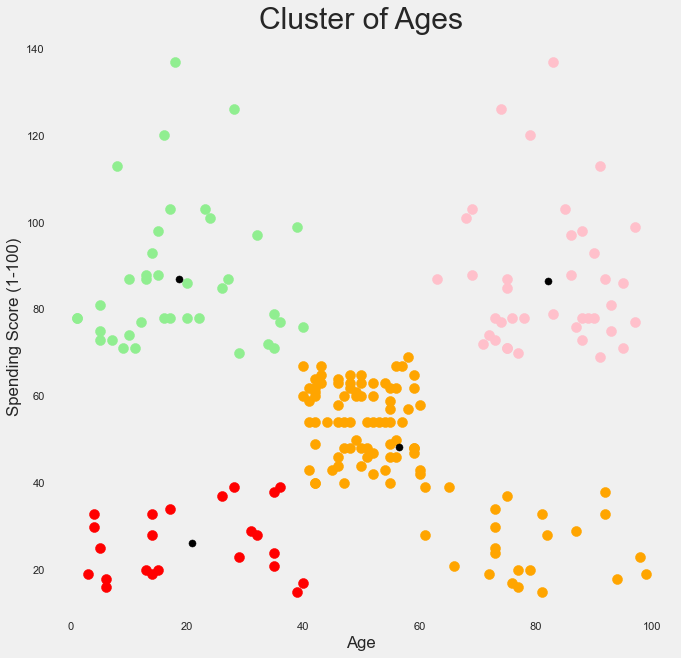

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink',label='Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange',label='Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen',label='Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red',label='Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()